# geopandas (การทำงานกับ line shape map)
- ประเมินราคาที่ดินในเขตกรุงเทพมหานคร
  - http://www.bangkokgis.com/modules.php?m=download_shapefile
    - http://www.bangkokgis.com/bangkokgis_2008/userfiles/files/download/shapefile/plan/land_value.rar

## create `geo` environment

```
conda create -n geo python=3.8
conda activate geo

conda install -c conda-forge geopandas openpyxl
conda install -c conda-forge ipykernel

```


-   Note: how to convert shp to TopoJSON (for Power BI)
    -   https://mapshaper.org/


---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/
* kaggle: https://www.kaggle.com/prasertk/
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---


<a href=https://youtu.be/aRu9ErJhr50><img src=https://i.ytimg.com/vi/aRu9ErJhr50/hqdefault.jpg width=560 /><p>Play YouTube Video</p></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import shutil

fiona.drvsupport.supported_drivers[ "libkml" ] = "rw"  # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers[ "LIBKML" ] = "rw"  # enable KML support which is disabled
fiona.supported_drivers  # write to format

print(f"geopandas version {gpd.__version__}")
print(f"fiona version {fiona.__version__}")

print(pd.Timestamp.now())
# today = pd.Timestamp.now().strftime("%Y-%m-%d")


geopandas version 0.11.1
fiona version 1.8.21
2022-08-02 12:44:39.234273


In [2]:
url=r'C:\Users\prasert\Downloads\land_value'
# gdf=gpd.read_file(url)
gdf = gpd.read_file(url, encoding="cp874") # code page 874
gdf[:3]


,name,price_min,price_max,remark,URL,geometry
0,ถนนสมเด็จพระปิ่นเกล้า,"50,000","170,000",บางกอกน้อย บางพลัด,None,"LINESTRING (660212.987 1523144.409, 660397.067..."
1,ถนนบรมราชชนนีจากสี่แยกพระปิ่นเกล้าถึงคลองบางกอ...,"85,000","150,000",บางกอกน้อย บางพลัด,None,"LINESTRING (660211.836 1523142.242, 658857.704..."
2,ถนนบรมราชชนนีจากคลองบางกอกน้อยถึงเขตอำเภอพุทธม...,"10,000","80,000",ทวีวัฒนา ตลิ่งชัน,None,"LINESTRING (658438.192 1524632.522, 655982.635..."


In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       834 non-null    object  
 1   price_min  834 non-null    object  
 2   price_max  834 non-null    object  
 3   remark     834 non-null    object  
 4   URL        0 non-null      object  
 5   geometry   834 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 39.2+ KB


In [4]:
gdf.drop(columns=['URL'], inplace=True)

In [5]:
gdf['price_min']=pd.to_numeric(gdf['price_min'].str.replace('\D', '', regex=True), errors='coerce')
gdf['price_max']=pd.to_numeric(gdf['price_max'].str.replace('\D', '', regex=True), errors='coerce')

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       834 non-null    object  
 1   price_min  834 non-null    int64   
 2   price_max  834 non-null    int64   
 3   remark     834 non-null    object  
 4   geometry   834 non-null    geometry
dtypes: geometry(1), int64(2), object(2)
memory usage: 32.7+ KB


In [7]:
gdf.crs

<Derived Projected CRS: EPSG:32647>
Name: WGS 84 / UTM zone 47N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°E and 102°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Myanmar (Burma). Russian Federation. Thailand.
- bounds: (96.0, 0.0, 102.0, 84.0)
Coordinate Operation:
- name: UTM zone 47N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

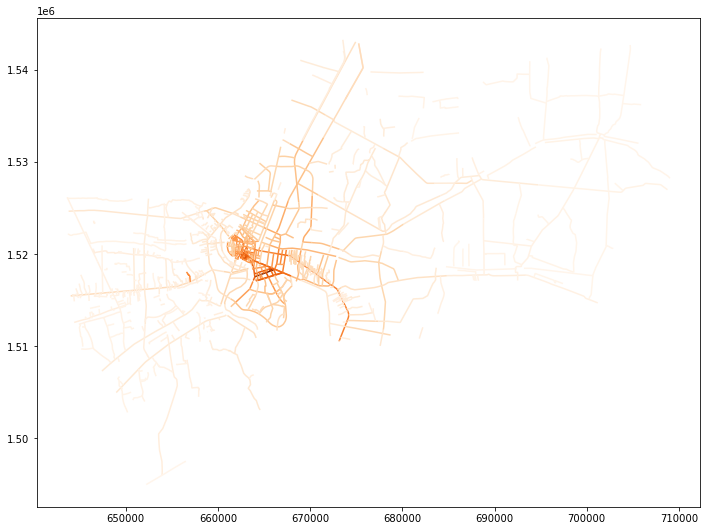

In [19]:
# gdf.plot(figsize=(16, 9), column='name')
# gdf.plot(column='name', figsize=(16, 9), linewidth=3, cmap='Oranges')
gdf.plot(figsize=(16, 9), column='price_max', cmap='Oranges')
# plt.axis('off')
# plt.savefig('land_value.svg')

In [9]:
# ["OpenStreetMap", "Stamen Terrain", “Stamen Toner", “Stamen Watercolor" "CartoDB positron", “CartoDB dark_matter"]
gdf.explore(tiles='CartoDB positron', column='price_max', cmap='Oranges')

In [10]:
gdf['remark'].unique()

array(['บางกอกน้อย บางพลัด', 'ทวีวัฒนา ตลิ่งชัน', 'บางพลัด',
       'บางพลัด บางกอกน้อย', 'บางกอกน้อย', 'ตลิ่งชัน',
       'ตลิ่งชัน บางกอกน้อย', 'ทวีวัฒนา', 'บางกอกน้อย ตลิ่งชัน',
       'จตุจักร', 'บางรัก', 'สาทร', 'ยานนาวา', 'บางคอแหลม',
       'ป้อมปราบศัตรูพ่าย', 'ปทุมวัน', 'สัมพันธวงศ์', 'พระนคร', 'ดุสิต',
       'บางซื่อ', 'บางชื่อ', 'หลักสี่', 'หลักสี่,ดอนเมือง', 'ดอนเมือง',
       'บางขุนเทียน,จอมทอง', 'จอมทอง', 'จอมทอง,บางบอน', 'บางขุนเทียน',
       'บางบอน', 'บางบอน,บางขุนเทียน', 'บางขุนเทียน,บางบอน',
       'บึงกุ่ม,คันนายาว', 'สะพานสูง', 'บึงกุ่ม', 'คันนายาว',
       'เขตสะพานสูง', 'พระโขนง,บางนา,คลองเตย,วัฒนา', 'คลองเตย', 'บางนา',
       'คลองเตย,พระโขนง,บางนา', 'วัฒนา', 'พระโขนง,บางนา', 'พระโขนง',
       'วัฒนา,พระโขนง', 'คลองเตย,พระโขนง', 'ลาดกระบัง',
       'หนองแขม,บางแค,ภาษีเจริญ', 'บางแค', 'ภาษีเจริญ', 'บางแค,ภาษีเจริญ',
       'หนองแขม', 'บางแค,หนองแขม', 'สายไหม',
       'ห้วยขวาง,วังทองหลาง,ลาดพร้าว,บางเขน', 'บางเขน', 'ลาดพร้าว,บางเขน',
       'คลองสามวา', 'ราชเทว

In [11]:
# tiles: ["OpenStreetMap", "Stamen Terrain", "Stamen Toner", "Stamen Watercolor" "CartoDB positron", "CartoDB dark_matter"]

# gdf[:].explore()
# m = gdf[:].explore(column='name', legend=False, tiles='Stamen Toner', style_kwds={'weight': 3})
m = gdf[:].explore(column='price_max', legend=True, tiles='Stamen Toner', style_kwds={'weight': 3}, cmap='Oranges')
m

In [12]:
output_file='land value'

In [13]:
m.save(f'{output_file}.html')

In [14]:
gdf.to_file(f"{output_file}", encoding="utf-8", driver="ESRI Shapefile")

In [15]:
shutil.make_archive(f"{output_file}", "zip", f"{output_file}")

't:\\gis\\land value.zip'

In [16]:
df=gpd.read_file('land value.zip')
df

,name,price_min,price_max,remark,geometry
0,ถนนสมเด็จพระปิ่นเกล้า,50000,170000,บางกอกน้อย บางพลัด,"LINESTRING (660212.987 1523144.409, 660397.067..."
1,ถนนบรมราชชนนีจากสี่แยกพระปิ่นเกล้าถึงคลองบางกอ...,85000,150000,บางกอกน้อย บางพลัด,"LINESTRING (660211.836 1523142.242, 658857.704..."
2,ถนนบรมราชชนนีจากคลองบางกอกน้อยถึงเขตอำเภอพุทธม...,10000,80000,ทวีวัฒนา ตลิ่งชัน,"LINESTRING (658438.192 1524632.522, 655982.635..."
3,ถนนสิรินธร,68000,150000,บางพลัด,"LINESTRING (658854.104 1524614.392, 658842.507..."
4,ถนนจรัญสนิทวงศ์,34000,100000,บางพลัด บางกอกน้อย,"LINESTRING (658989.471 1519800.208, 658836.878..."
...,...,...,...,...,...
829,ถนนเลียบคลองสิบสาม,850,4300,หนองจอก,"LINESTRING (701872.714 1532891.469, 701929.393..."
830,ถนนคลองสิบ-คลองสิบสี่,850,4300,หนองจอก,"LINESTRING (704011.355 1537181.193, 702970.368..."
831,ถนนคลองเก้า,850,3800,หนองจอก,"LINESTRING (695608.656 1536357.271, 694547.435..."
832,ถนนนิลเหมนิยม,850,3400,หนองจอก,"LINESTRING (702101.634 1520969.637, 702112.851..."


In [17]:
gdf.to_file(f"{output_file}.kml", encoding="utf-8", driver="libkml")

## export to CSV and Excel (with lat, lon columns)


In [18]:
gdf.drop(columns=["geometry"]).to_csv(f"{output_file}.csv", index=False)
gdf.drop(columns=["geometry"]).to_excel(f"{output_file}.xlsx", index=False)